In [9]:
#Step 1 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [10]:
# Step 2 Provide the GitHub raw URL of your CSV file
github_url = 'https://raw.githubusercontent.com/Thathmi90/MOLBIO-550_Project2/main/growth%20curve.csv'

# Step 3 Read the sheet with replicates (Sheet1)
# If your sheet name differs, change 'Sheet1' or use sheet index (e.g., sheet_name=1)
df = pd.read_csv(github_url)

In [11]:
#  Step 4: Show the first few rows
print(df.head())

   Hours   WT 1   WT 2   WT 3  DHNOX 1  DHNOX 2  DHNOX 3
0      0  0.044  0.045  0.050    0.043    0.044    0.045
1      4  0.281  0.246  0.244    0.218    0.233    0.239
2      8  0.569  0.525  0.531    0.620    0.567    0.522
3     12  0.812  0.788  0.748    0.744    0.782    0.730
4     16  1.191  1.071  1.063    1.252    1.086    1.042


In [12]:
# Step 5 Tidy to long format and compute mean ± SEM per strain & time ===
time_col = df.columns[0]                       # first column (e.g., 'Hours')
value_cols = df.columns[1:]                    # replicate columns

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='StrainRep',
                  value_name='OD')

# Remove trailing replicate number to get the base strain name (e.g.,"WT_1" -> "WT")
long_df['Strain'] = long_df['StrainRep'].str.replace(r'\s*\d+$', '', regex=True)

# mean and SEM = std/sqrt(n) for each time × strain
summary = (long_df
           .groupby([time_col, 'Strain'], as_index=False)
           .agg(mean=('OD', 'mean'),
                sem =('OD', lambda x: x.std(ddof=1) / np.sqrt(len(x)))))

print("Summary (first rows):\n", summary.head(), "\n")

Summary (first rows):
    Hours Strain      mean       sem
0      0  DHNOX  0.044000  0.000577
1      0     WT  0.046333  0.001856
2      4  DHNOX  0.230000  0.006245
3      4     WT  0.257000  0.012014
4      8  DHNOX  0.569667  0.028322 



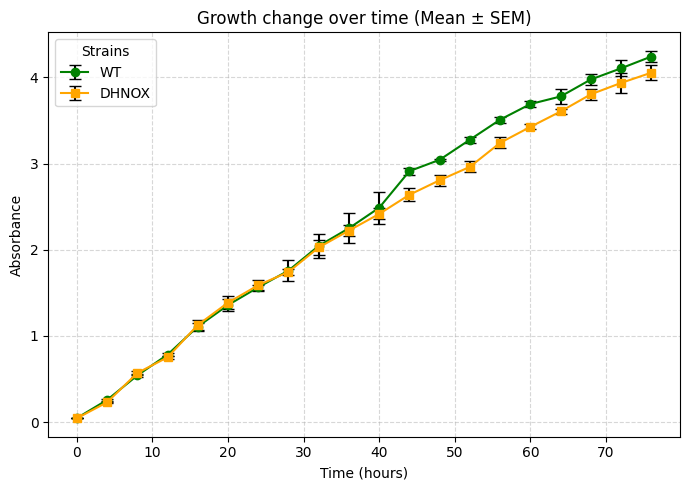

In [13]:
# === 4) Plot mean curves with SEM error bars ===
plt.figure(figsize=(7,5))

# WT: green line #errorbars color:black
plt.errorbar(summary[summary['Strain']=='WT'][time_col],
             summary[summary['Strain']=='WT']['mean'],
             yerr=summary[summary['Strain']=='WT']['sem'],
             fmt='-o', capsize=4, color='green', ecolor='black', label='WT')

# DHNOX : orange line #errorbars color:black
plt.errorbar(summary[summary['Strain']=='DHNOX'][time_col],
             summary[summary['Strain']=='DHNOX']['mean'],
             yerr=summary[summary['Strain']=='DHNOX']['sem'],
             fmt='-s', capsize=4, color='orange', ecolor='black', label='DHNOX')


plt.xlabel("Time (hours)")
plt.ylabel("Absorbance")
plt.title("Growth change over time (Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strains")
plt.tight_layout()
plt.show()

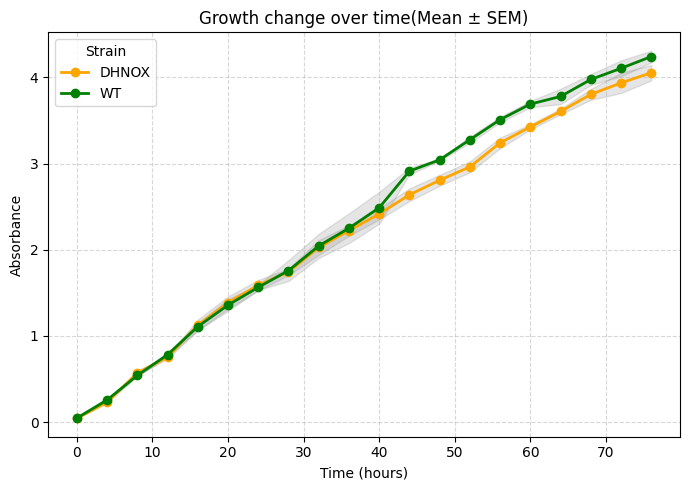

In [8]:
# === Step 6: Plot mean curves with SEM shading and custom colors ===
plt.figure(figsize=(7,5))

# Define colors for each strain
color_map = {
    'WT': 'green',
    'DHNOX': 'orange',
       # handles alternate delta symbol
}

for strain, sub in summary.groupby('Strain'):
    sub = sub.sort_values(time_col)
    x = sub[time_col].values
    y = sub['mean'].values
    e = sub['sem'].values

    # Pick color for the line (default gray if strain not in color_map)
    line_color = color_map.get(strain, 'gray')

    # Plot line + markers
    plt.plot(x, y, marker='o', label=strain, color=line_color, linewidth=2)

    # SEM shading (always gray)
    plt.fill_between(x, y - e, y + e, alpha=0.2, color='gray')

plt.xlabel("Time (hours)")
plt.ylabel("Absorbance")
plt.title("Growth change over time(Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain")
plt.tight_layout()
plt.show()